In [45]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [43]:
path = 'C:/Users/Marie/Desktop/MSc DSBA/3. Big Data Algorithms and Platforms/'

In [51]:
df_tweet = pd.read_csv(path + 'trump_tweets.txt', names = ['tweet_id', 'tweet_user_id', 'tweet_creation_date', 'tweet_text'])

In [54]:
df_tweet.head()

,tweet_id,tweet_user_id,tweet_creation_date,tweet_text
0,933354508645748736,765213068,2017-11-22 15:20:30,RT @baileyjer: The National Enquirer is embara...
1,933354508972834816,1100048125,2017-11-22 15:20:30,"RT @ChrisCJackson: Lincoln: ""Four score and se..."
2,933354509253869573,20072329,2017-11-22 15:20:30,RT @EdKrassen: There is no point in having an ...
3,933354509425930243,251138148,2017-11-22 15:20:30,RT @lil_swingin_D: Donald trump calling lavar ...
4,933354509266546688,3884065459,2017-11-22 15:20:30,RT @NancySinatra: Ignorance is bliss. I'm disa...


In [57]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

df_tweet['text_array'] = df_tweet['tweet_text'].apply(lambda x: tokenizer.tokenize(x.lower()))

In [61]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
                 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
                 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
                 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
                 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does',
                 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
                 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
                 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here',
                 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
                 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
                 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now', 'rt']

In [62]:
df_tweet['important'] = df_tweet['text_array'].apply(lambda x: [y for y in x if y not in stopwords])

In [71]:
frequencies ={}
for row in df_tweet['important']:
    for word in row:
        if word in frequencies.keys():
            frequencies[word] +=1
        else :
            frequencies[word] = 1
            
frequencies = pd.Series(frequencies).sort_values(ascending=False) 

In [76]:
most_frequent = list(frequencies[:50].keys())

In [80]:
for col in most_frequent:
    df_tweet[col] = df_tweet['important'].apply(lambda x: col if col in x else '' )

In [84]:
df_tweet['most_important_array'] = df_tweet['important'].apply(lambda x: [y for y in x if y in most_frequent])

In [88]:
df_tweet['edges'] = df_tweet['most_important_array'].apply(lambda x: [(y,z) for y in x for z in x if y!=z])

In [91]:
df_tweet['edges'] = df_tweet['edges'].apply(lambda x: x[:int(len(x)/2)])

In [92]:
df_tweet.head()

,tweet_id,tweet_user_id,tweet_creation_date,tweet_text,text_array,important,trump,https,co,donald,...,johnson,funder,today,according,10,re,far,right,most_important_array,edges
0,933354508645748736,765213068,2017-11-22 15:20:30,RT @baileyjer: The National Enquirer is embara...,"[rt, baileyjer, the, national, enquirer, is, e...","[baileyjer, national, enquirer, embarassed, lo...",,https,co,,...,,,,,,,,,"[https, co]","[(https, co)]"
1,933354508972834816,1100048125,2017-11-22 15:20:30,"RT @ChrisCJackson: Lincoln: ""Four score and se...","[rt, chriscjackson, lincoln, four, score, and,...","[chriscjackson, lincoln, four, score, seven, y...",,,,,...,,,,,,,,,[years],[]
2,933354509253869573,20072329,2017-11-22 15:20:30,RT @EdKrassen: There is no point in having an ...,"[rt, edkrassen, there, is, no, point, in, havi...","[edkrassen, point, argument, trump, supporter,...",trump,,,,...,,,,,,,,,[trump],[]
3,933354509425930243,251138148,2017-11-22 15:20:30,RT @lil_swingin_D: Donald trump calling lavar ...,"[rt, lil_swingin_d, donald, trump, calling, la...","[lil_swingin_d, donald, trump, calling, lavar,...",trump,https,co,donald,...,,,,,,,,,"[donald, trump, lavar, ball, poor, king, https...","[(donald, trump), (donald, lavar), (donald, ba..."
4,933354509266546688,3884065459,2017-11-22 15:20:30,RT @NancySinatra: Ignorance is bliss. I'm disa...,"[rt, nancysinatra, ignorance, is, bliss, i, m,...","[nancysinatra, ignorance, bliss, m, disappoint...",,https,co,,...,,,,,,,,,"[m, people, https, co]","[(m, people), (m, https), (m, co), (people, m)..."


In [82]:
tweet_graph = nx.graph.Graph()

In [83]:
for word in most_frequent:
    tweet_graph.add_node(word)

In [101]:
edge_frequencies = {}
for row in df_tweet['edges']:
    for edge in row:
        if edge in edge_frequencies.keys():
            edge_frequencies[edge]+=1
        else :
            edge_frequencies[edge]=1

weighted_edges = []

for edge in edge_frequencies.keys():
    x,y = edge
    weighted_edges.append((x, y, edge_frequencies[edge])) 

In [102]:
for edge in edge_frequencies:
    tweet_graph.add_weighted_edges_from(weighted_edges)

In [114]:
pos=nx.spring_layout(tweet_graph)

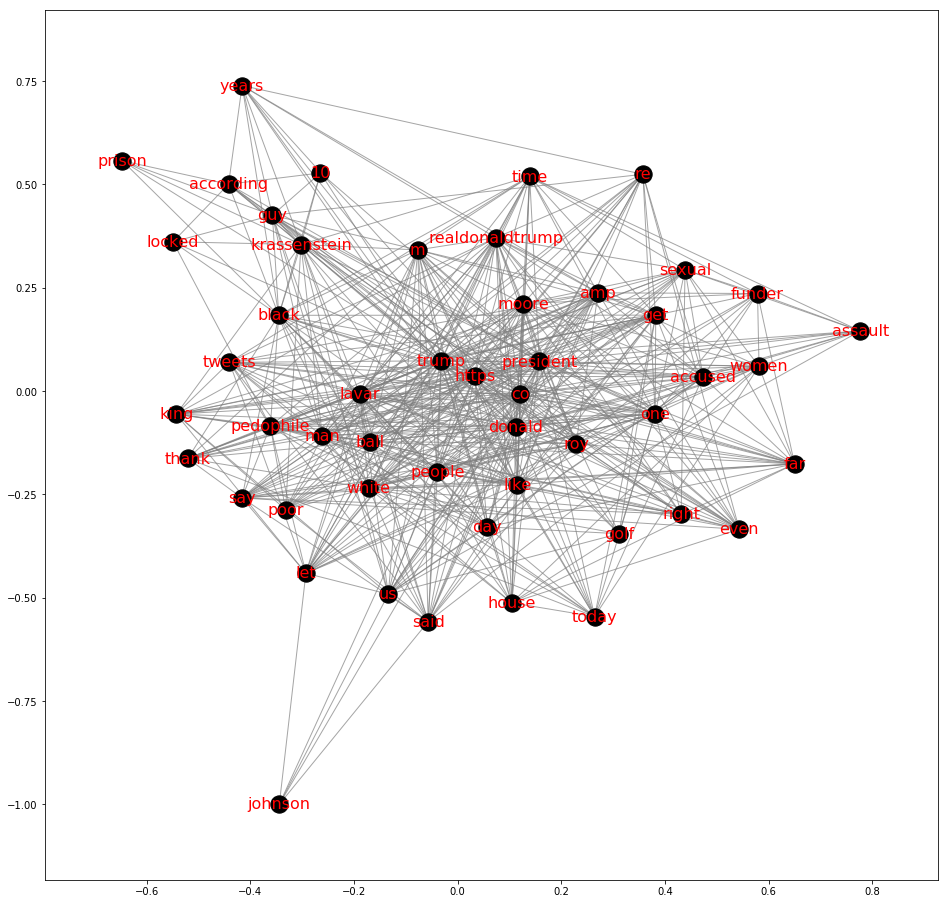

In [132]:
plt.figure(figsize=(16,16))
nx.draw_networkx_nodes(tweet_graph, pos, node_color = 'black')
nx.draw_networkx_edges(tweet_graph, pos, alpha = .7, edge_color = 'grey')
nx.draw_networkx_labels(tweet_graph, pos, font_color  = 'red', font_size = 16)
plt.savefig(path + 'trump_tweets.png')
plt.show()